## PSET 4 Problem 3:

#### (a)

In [1]:
import numpy as np
import numpy.linalg as lin
import scipy.stats as sts
import scipy.integrate as intgr
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

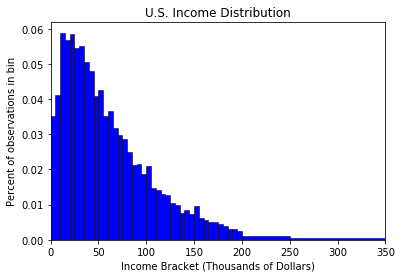

In [2]:
incs = np.loadtxt('usincmoms.txt', delimiter='\t')
incs[:,1] = incs[:,1] / 1000
incs[:,[1,0]] = incs[:,[0,1]]

num_bins = 42
rects = plt.bar(incs[:,0], incs[:,1], width=5, color='b',
                edgecolor='black', linewidth=0.5,
                align='center')

rects[40].set_width(50)
rects[40].set_x(200)
rects[40].set_height(rects[40].get_height() / 20)
rects[41].set_width(100)
rects[41].set_x(250)
rects[41].set_height(rects[41].get_height() / 40)
plt.xlabel('Income Bracket (Thousands of Dollars)')
plt.ylabel('Percent of observations in bin')
plt.xlim([0, 350])
plt.title("U.S. Income Distribution")
plt.show()

#### (b)

In [24]:
def lognorm_pdf(x, mu, sigma):
    return sts.lognorm.pdf(x, 1, mu, sigma)

def data_moments(xvals):
    return xvals

def model_moments(bracks, mu, sigma):
    moms = np.zeros_like(bracks)
    xfx = lambda x: lognorm_pdf(x, mu, sigma)
    for i in range(40):
        moms[i] = intgr.quad(xfx, bracks[i] - 2.5, 
                             bracks[i] + 2.5)[0]
    moms[40] = intgr.quad(xfx, bracks[40]-25, bracks[40]+25)[0]
    moms[41] = intgr.quad(xfx, bracks[41]-50, bracks[41]+50)[0]

    return moms

def err_vec(xvals, bracks, mu, sigma):
    moms_data = data_moments(xvals)
    moms_model = model_moments(bracks, mu, sigma)
    
    err_vec = (moms_model - moms_data) / moms_data
    return err_vec

def criterion(params, *args):
    mu, sigma = params
    xvals, W, bracks = args
    err = err_vec(xvals, bracks, mu, sigma)
    crit_val = (err.T @ W) @ err
    
    return crit_val

def weight_arr(xvals):
    return np.diag(xvals)

xvals = incs[:,1]
bracks = incs[:,0]
mu_init = incs[:,0] @ incs[:,1]
sig_init = 30
params_init = np.array([mu_init, sig_init])
W_hat = weight_arr(xvals)
gmm_args = (xvals, W_hat, bracks)
results = opt.minimize(criterion, params_init, args=(gmm_args),
                       method='L-BFGS-B',
                        bounds=((1e-10,None),(1e-10,None)))

mu_GMM1, sig_GMM1 = results.x
crit_GMM1 = criterion(np.array([mu_GMM1, sig_GMM1]), 
                      xvals, W_hat, bracks)
print('mu_GMM1=', mu_GMM1, '\nsig_GMM1=', sig_GMM1)
print('\nCriterion value=', crit_GMM1)

mu_GMM1= 1e-10 
sig_GMM1= 48.9668512792

Criterion value= 0.0360113341876


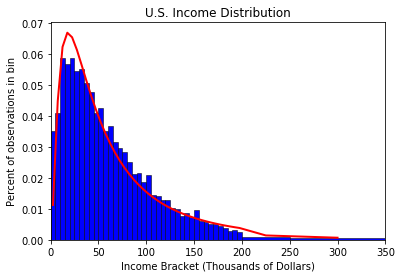

In [20]:
num_bins = 42
ind = np.arange(0, num_bins * 5, 5)
rects = plt.bar(incs[:,0], incs[:,1], width=5, color='b',
                edgecolor='black', linewidth=0.5,
                align='center')

rects[40].set_width(50)
rects[40].set_x(200)
rects[40].set_height(rects[40].get_height() / 20)
rects[41].set_width(100)
rects[41].set_x(250)
rects[41].set_height(rects[41].get_height() / 40)
plt.xlabel('Income Bracket (Thousands of Dollars)')
plt.ylabel('Percent of observations in bin')
plt.xlim([0, 350])
plt.title("U.S. Income Distribution")

dist_pts = np.linspace(0, 350, 500)
model_moms = model_moments(bracks, mu_GMM1, sig_GMM1)
model_moms[40] /= 20
model_moms[41] /= 40

plt.plot(bracks, model_moms, linewidth=2, color='red')
plt.show()

#### (c)

In [26]:
import math

def gamma_pdf(xvals, alpha, beta):
    return sts.gamma.pdf(xvals, alpha, scale=(1/beta))

def data_moments_ga(xvals):
    return xvals

def model_moments_ga(bracks, alpha, beta):
    moms = np.zeros_like(bracks)
    xfx = lambda x: gamma_pdf(x, alpha, beta)
    for i in range(40):
        moms[i] = intgr.quad(xfx, bracks[i] - 2.5, 
                             bracks[i] + 2.5)[0]
    moms[40] = intgr.quad(xfx, bracks[40]-25, bracks[40]+25)[0]
    moms[41] = intgr.quad(xfx, bracks[41]-50, bracks[41]+50)[0]
    return moms

def err_vec_ga(xvals, bracks, alpha, beta):
    moms_data = data_moments_ga(xvals)
    moms_model = model_moments_ga(bracks, alpha, beta)
    
    err_vec = (moms_model - moms_data) / moms_data
    return err_vec

def criterion_ga(params, *args):
    alpha, beta = params
    xvals, W, bracks = args
    err = err_vec_ga(xvals, bracks, alpha, beta)
    crit_val = (err.T @ W) @ err
    
    return crit_val

def weight_arr(xvals):
    return np.diag(xvals)

xvals = incs[:,1]
bracks = incs[:,0]
alpha_init = 3
beta_init = 20000
params_init_ga = np.array([alpha_init, beta_init])
W_hat = weight_arr(xvals)
gmm_args = (xvals, W_hat, bracks)
results = opt.minimize(criterion_ga, params_init_ga, args=(gmm_args),
                       method='L-BFGS-B',
                        bounds=((1e-10,None),(1e-10,None)))

alpha_GMM, beta_GMM = results.x
crit_GMM1 = criterion_ga(np.array([alpha_GMM, beta_GMM]), 
                         xvals, W_hat, bracks)
print("Converged?", results.success)
print('alpha_GMM=', alpha_GMM, '\nbeta_GMM=', beta_GMM)
print('Criterion value=', crit_GMM1)


Converged? True
alpha_GMM= 3.0 
beta_GMM= 20000.0
Criterion value= 1.0


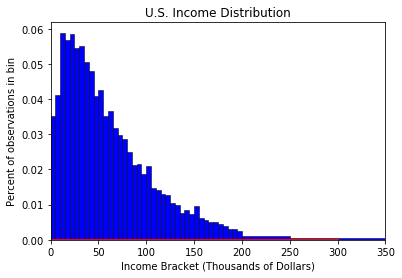

In [27]:
num_bins = 42
ind = np.arange(0, num_bins * 5, 5)
rects = plt.bar(incs[:,0], incs[:,1], width=5, color='b',
                edgecolor='black', linewidth=0.5,
                align='center')

rects[40].set_width(50)
rects[40].set_x(200)
rects[40].set_height(rects[40].get_height() / 20)
rects[41].set_width(100)
rects[41].set_x(250)
rects[41].set_height(rects[41].get_height() / 40)
plt.xlabel('Income Bracket (Thousands of Dollars)')
plt.ylabel('Percent of observations in bin')
plt.xlim([0, 350])
plt.title("U.S. Income Distribution")


model_moms = model_moments_ga(bracks, alpha_GMM, beta_GMM)
plt.plot(bracks, model_moms, linewidth=2, color='r')
plt.show()